# Testing if the AUC during stimulation patterns are different between WT and KO groups
### 9 april 2024
*Célien Vandromme*

---

In [1]:
import numpy as np
import pandas as pd
import percephone.core.recording as pc
import os
import percephone.plts.behavior as pbh
import matplotlib
import percephone.plts.stats as ppt
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count, pool
import warnings

plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.switch_backend("Qt5Agg")
matplotlib.use("Qt5Agg")
%matplotlib inline
warnings.filterwarnings('ignore')
fontsize = 30

In [2]:
directory = "C:/Users/cvandromme/Desktop/Data/"
roi_info = pd.read_excel("C:/Users/cvandromme/Desktop/FmKO_ROIs&inhibitory.xlsx")
files = os.listdir(directory)
files_ = [file for file in files if file.endswith("synchro")]

In [3]:
def opening_rec(fil,i):
    rec = pc.RecordingAmplDet(directory + fil + "/", 0, fil, roi_info)
    return rec

In [4]:
workers = cpu_count()
pool = pool.ThreadPool(processes=workers)
async_results = [pool.apply_async(opening_rec, args=(file,i)) for i,file in enumerate(files_)]
recs = {ar.get().filename: ar.get() for ar in async_results}

Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.Behavioural information already incorporated in the analog.

Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.


In [5]:
for rec in recs.values():
    rec.auc()

# WT vs. KO - All amplitudes

---

## Comparison between WT and (KO + KO-Hypo) for all amplitudes

Boxplot plotting.
AUC
ShapiroResult(statistic=0.8877579093356948, pvalue=0.22301895417204942)
ShapiroResult(statistic=0.7780488886638884, pvalue=0.036962388584196)
MannwhitneyuResult(statistic=19.0, pvalue=0.5727605727605728)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.922283532394076, pvalue=0.44866547251087835)
ShapiroResult(statistic=0.9127197530257838, pvalue=0.45452950385110913)
TtestResult(statistic=-0.26701821033865464, pvalue=0.7939886256881727, df=12.0)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9339596992364809, pvalue=0.5527922006029502)
ShapiroResult(statistic=0.8612265078022259, pvalue=0.19341379025231514)
TtestResult(statistic=0.8459955083018325, pvalue=0.41410713377409325, df=12.0)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9921106868569991, pvalue=0.9976897055762041)
ShapiroResult(statistic=0.9104840414463081, pvalue=0.4395884390384064)
TtestResult(statistic=-0.7767479057637776, pvalue=0.45234736614410886, df=12.0)
Boxplot plotting.
AUC
ShapiroResult(stati

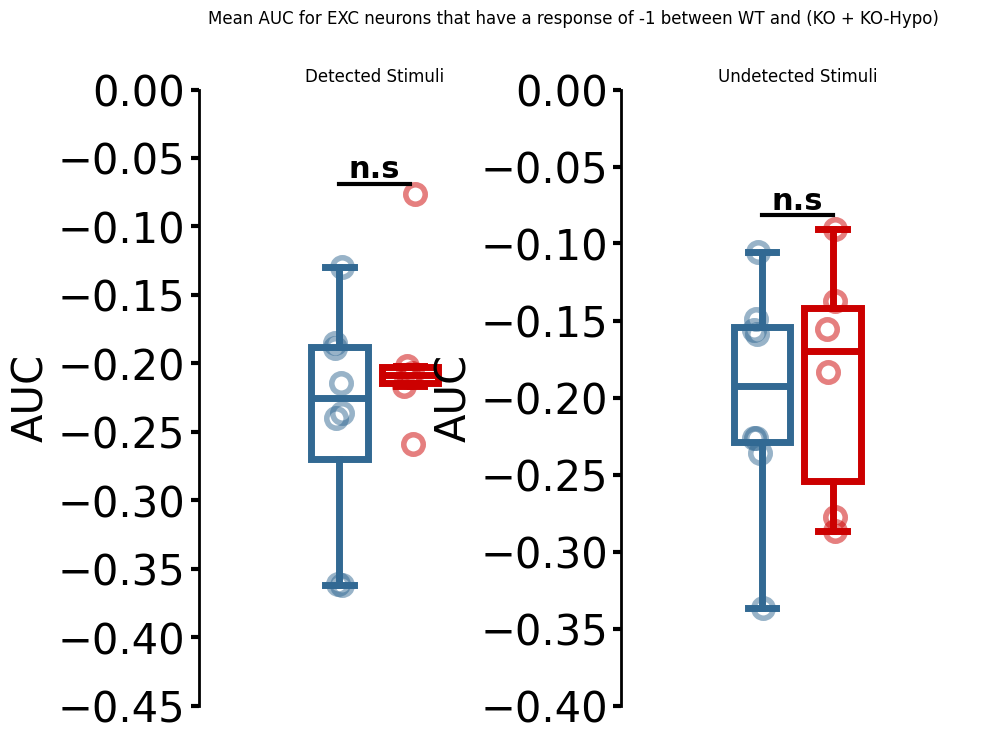

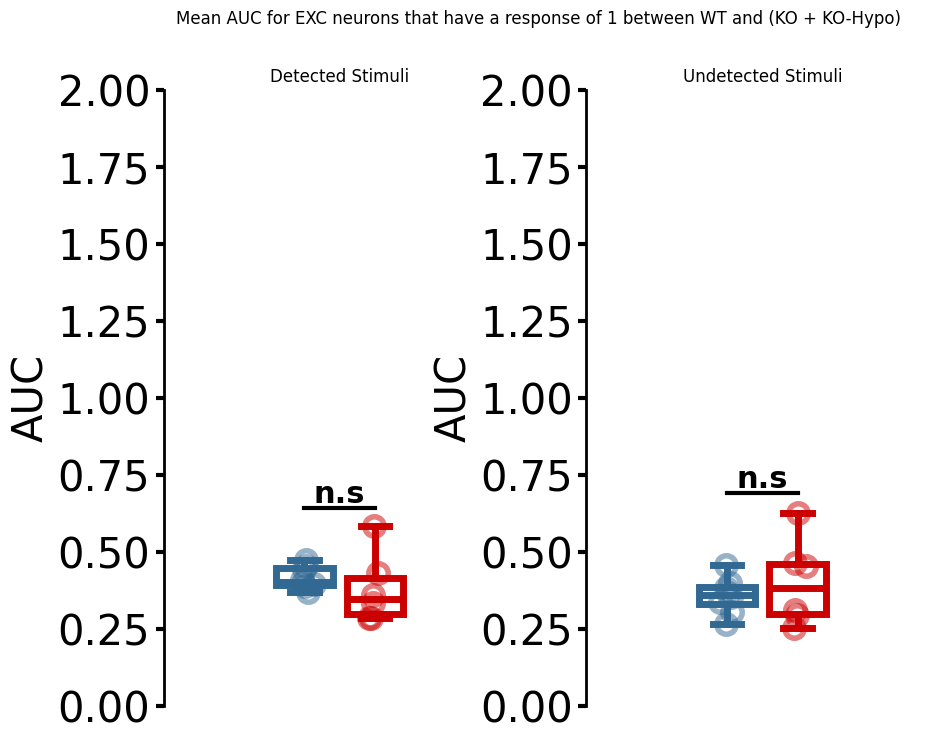

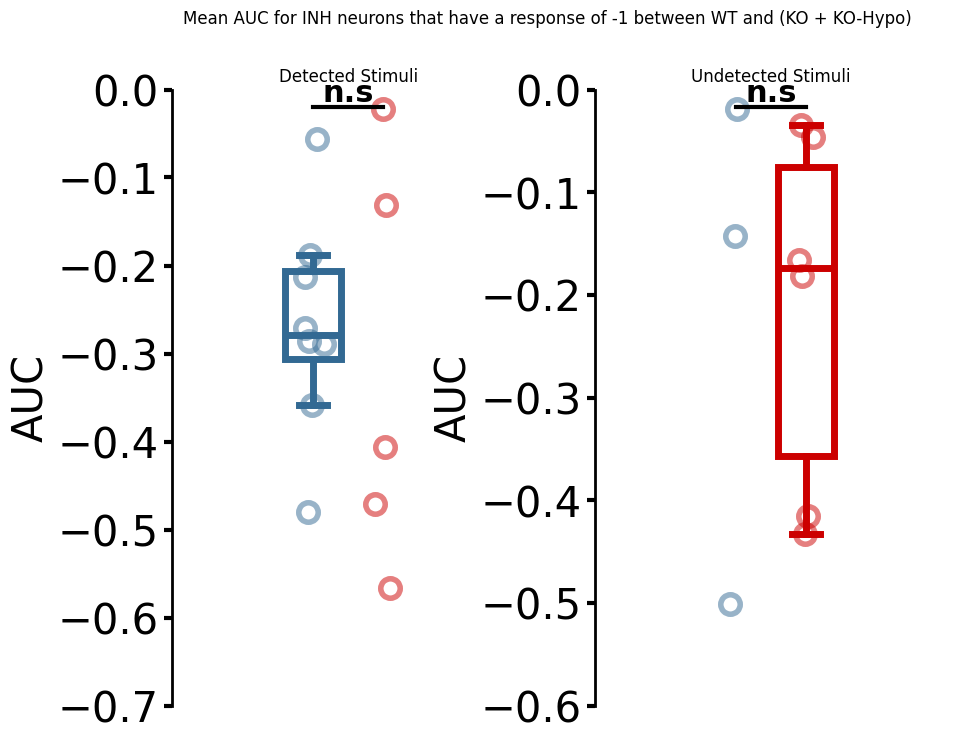

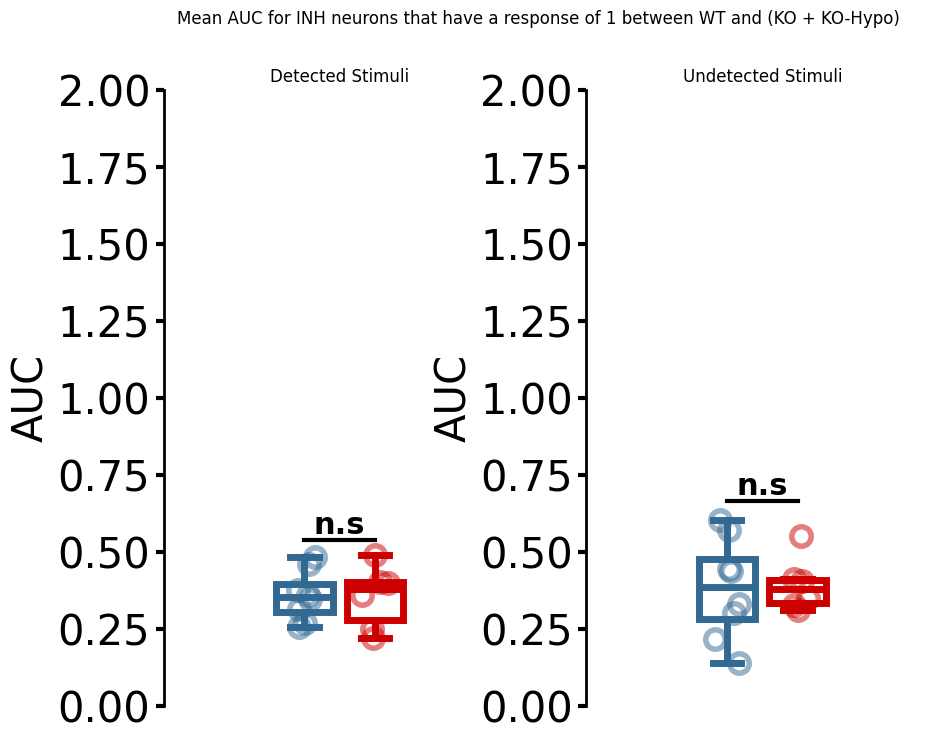

In [6]:
for neurone_type in ["EXC", "INH"]:
    for response_type in [-1, 1]:
        wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
        for rec in recs.values():
            # For detected stimuli
            resp_detected = rec.matrices[neurone_type]["Responsivity"][:,rec.detected_stim]
            detected = rec.matrices[neurone_type]["AUC"][:,rec.detected_stim]
            det = np.where(resp_detected == response_type, detected, np.nan)
            
            # For undetected stimuli
            resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,np.invert(rec.detected_stim)]
            undetected = rec.matrices[neurone_type]["AUC"][:,np.invert(rec.detected_stim)]
            undet = np.where(resp_undetected == response_type, undetected, np.nan)
            
            if rec.genotype == "WT":
                wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                # print(f"{rec.filename} -> det:{np.nanmean(np.nanmean(det, axis=1))} / undet:{np.nanmean(np.nanmean(undet, axis=1))}")
            else:
                ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            
        fig, axs = plt.subplots(1,2,figsize=(10,8))
        ppt.boxplot(axs[0], wt_det,ko_det,"AUC",ylim=[])
        ppt.boxplot(axs[1], wt_undet,ko_undet,"AUC",ylim=[])
        axs[0].set_title("Detected Stimuli")
        axs[1].set_title("Undetected Stimuli")
        fig.suptitle(f"Mean AUC for {neurone_type} neurons that have a response of {response_type} between WT and (KO + KO-Hypo)")

## Comparison between WT and KO-Hypo for all amplitudes

Boxplot plotting.
AUC
ShapiroResult(statistic=0.8877579093356948, pvalue=0.22301895417204942)
ShapiroResult(statistic=0.8853564817275801, pvalue=0.36201837110868146)
TtestResult(statistic=-1.0597368656552248, pvalue=0.3141895328839639, df=10.0)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.922283532394076, pvalue=0.44866547251087835)
ShapiroResult(statistic=0.9785067957984213, pvalue=0.8932070372343254)
TtestResult(statistic=-1.4690876336049055, pvalue=0.17255216108861204, df=10.0)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9339596992364809, pvalue=0.5527922006029502)
ShapiroResult(statistic=0.747022441148, pvalue=0.03621124626495095)
MannwhitneyuResult(statistic=24.0, pvalue=0.21414141414141416)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9921106868569991, pvalue=0.9976897055762041)
ShapiroResult(statistic=0.8646644931064491, pvalue=0.2772623769568694)
TtestResult(statistic=-0.2716524451343964, pvalue=0.7914150017740766, df=10.0)
Boxplot plotting.
AUC
ShapiroResult(statisti

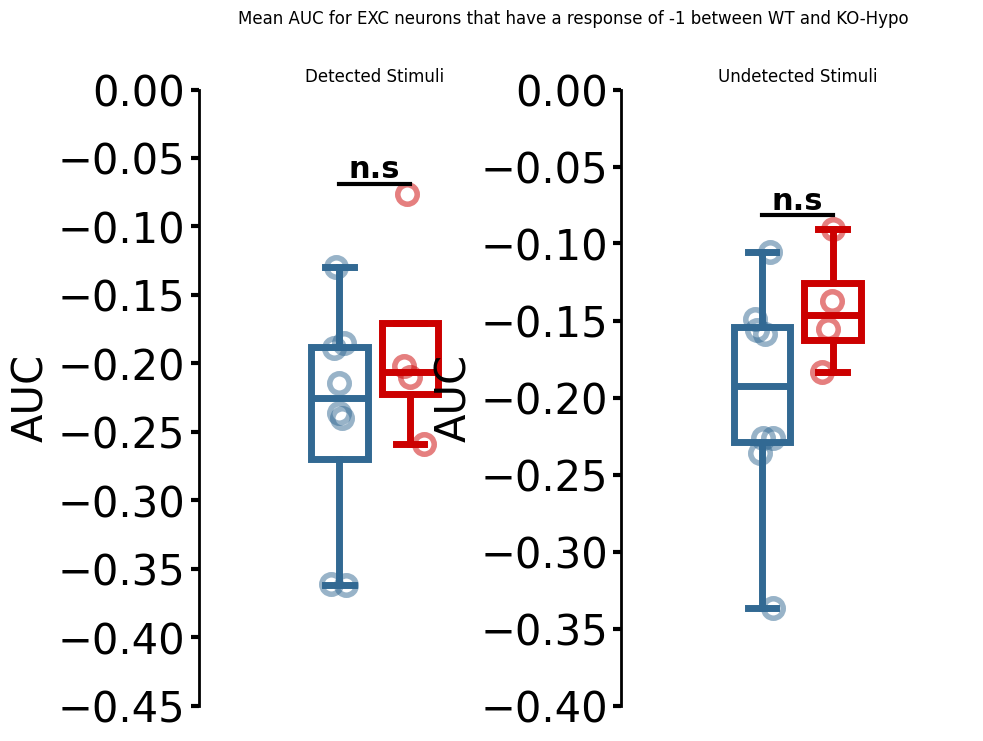

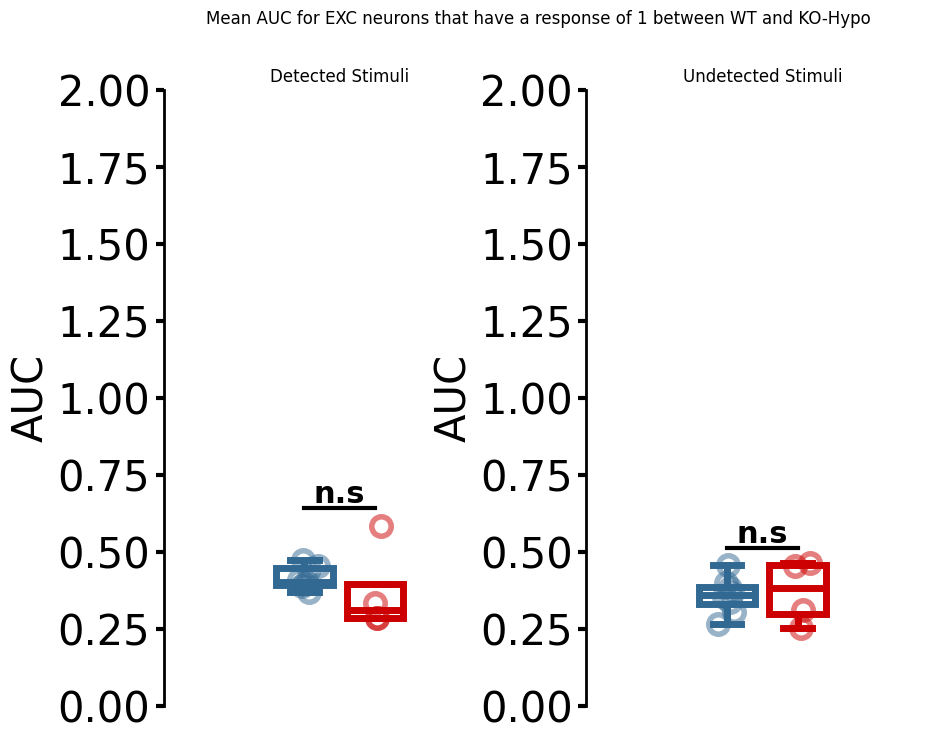

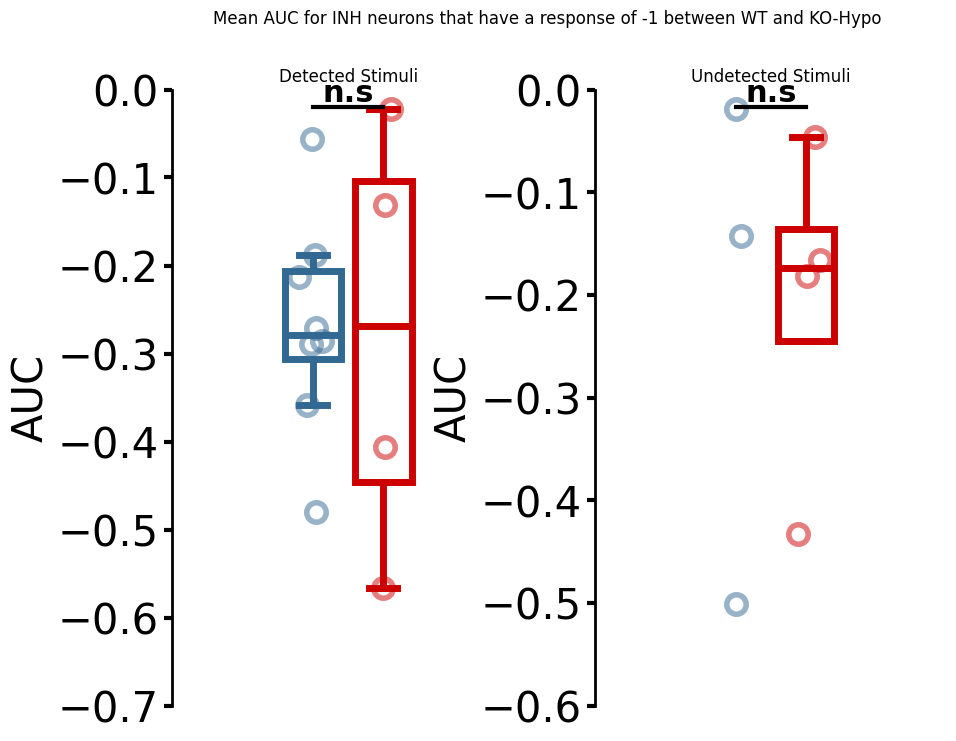

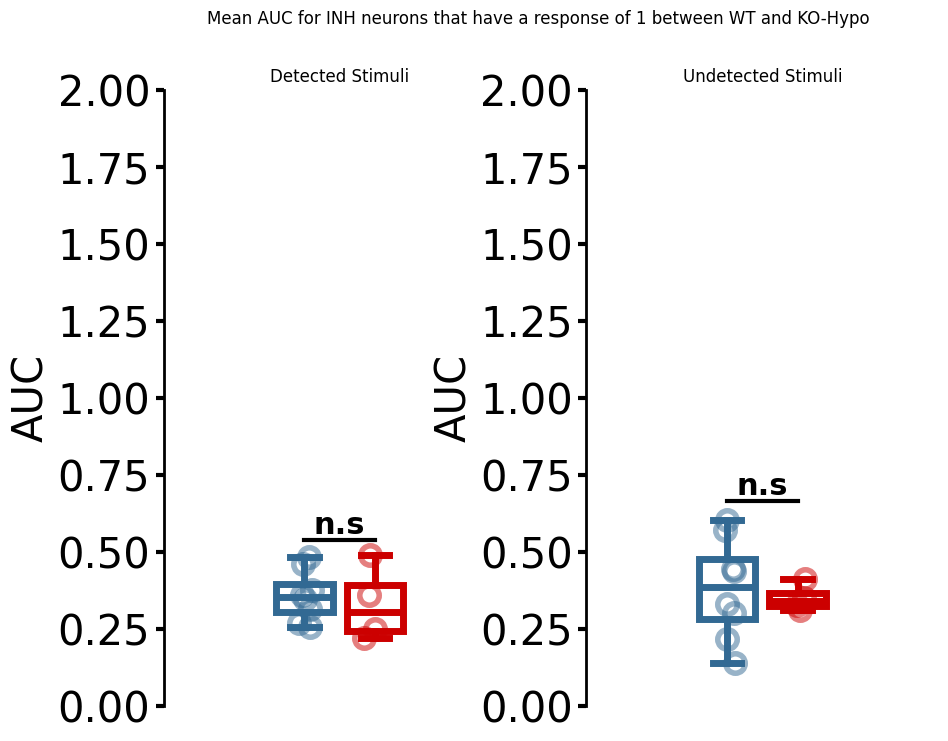

In [7]:
for neurone_type in ["EXC", "INH"]:
    for response_type in [-1, 1]:
        wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
        for rec in recs.values():
            # For detected stimuli
            resp_detected = rec.matrices[neurone_type]["Responsivity"][:,rec.detected_stim]
            detected = rec.matrices[neurone_type]["AUC"][:,rec.detected_stim]
            det = np.where(resp_detected == response_type, detected, np.nan)
            
            # For undetected stimuli
            resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,np.invert(rec.detected_stim)]
            undetected = rec.matrices[neurone_type]["AUC"][:,np.invert(rec.detected_stim)]
            undet = np.where(resp_undetected == response_type, undetected, np.nan)
            
            if rec.genotype == "WT":
                wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            elif rec.genotype == "KO-Hypo":
                ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            
        fig, axs = plt.subplots(1,2,figsize=(10,8))
        ppt.boxplot(axs[0], wt_det,ko_det,"AUC",ylim=[])
        ppt.boxplot(axs[1], wt_undet,ko_undet,"AUC",ylim=[])
        axs[0].set_title("Detected Stimuli")
        axs[1].set_title("Undetected Stimuli")
        fig.suptitle(f"Mean AUC for {neurone_type} neurons that have a response of {response_type} between WT and KO-Hypo")

# WT vs. KO - Threshold amplitude

---

## Comparison between WT and (KO + KO-Hypo) for stimulations at threshold amplitude

Boxplot plotting.
AUC
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.9366818471137228, pvalue=0.6325938831534172)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9944886920088295, pvalue=0.9993004951224285)
ShapiroResult(statistic=0.8959008482916235, pvalue=0.3502673632368643)
TtestResult(statistic=0.28112366335084893, pvalue=0.7834041096064063, df=12.0)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.8398650653592561, pvalue=0.07508213596461573)
ShapiroResult(statistic=0.8683094869058298, pvalue=0.219549285037833)
TtestResult(statistic=-0.8579288118075776, pvalue=0.40774094992146726, df=12.0)
Boxplot plotting.
AUC
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroResu

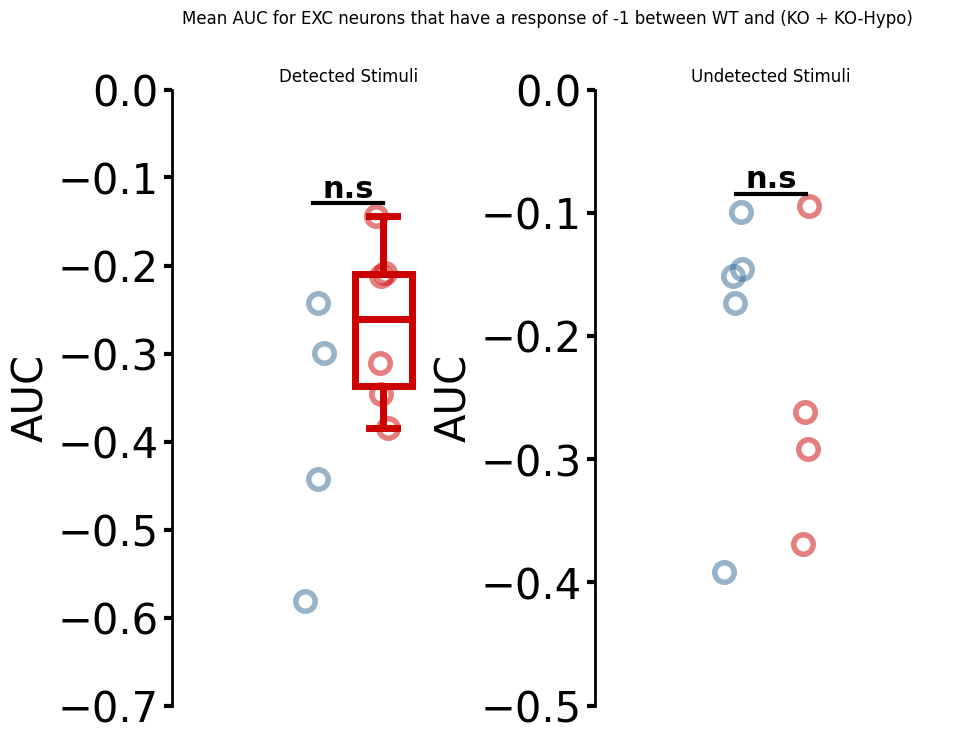

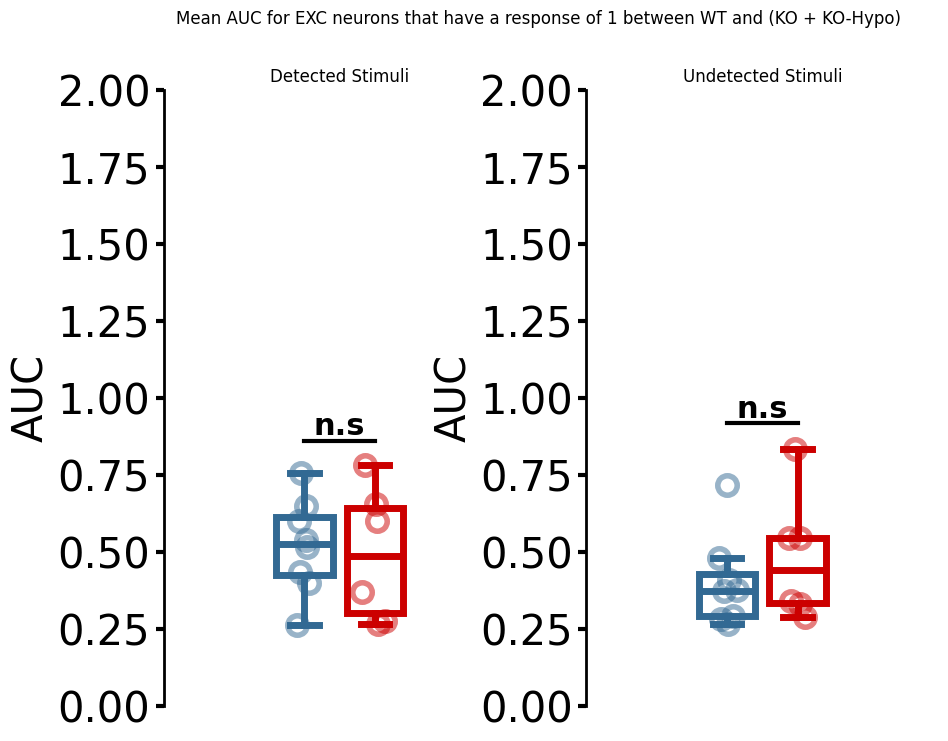

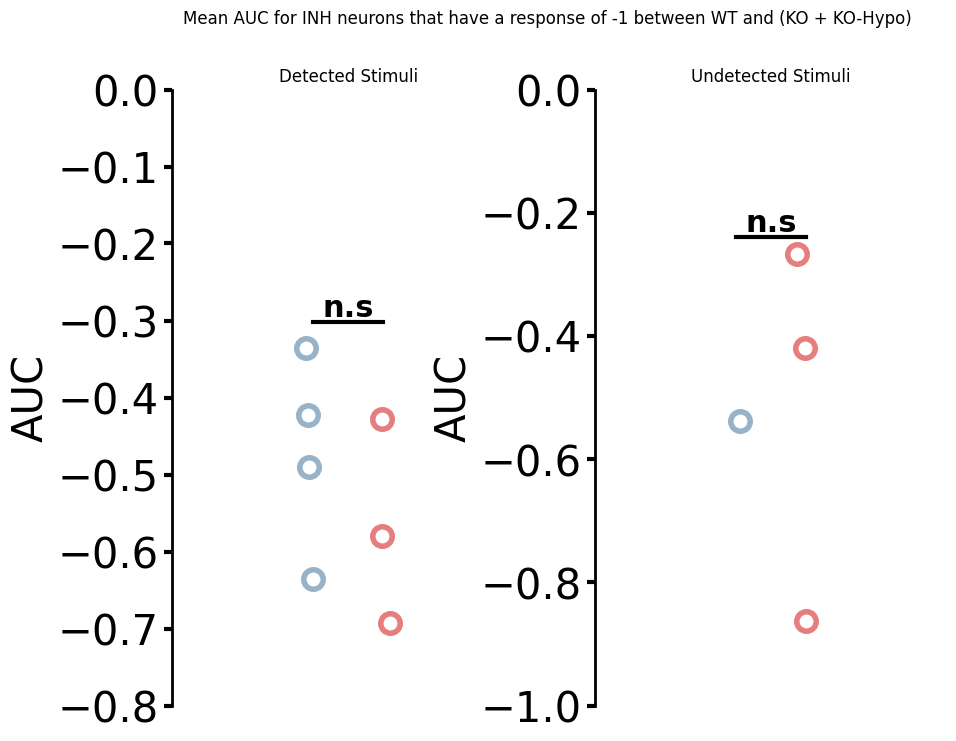

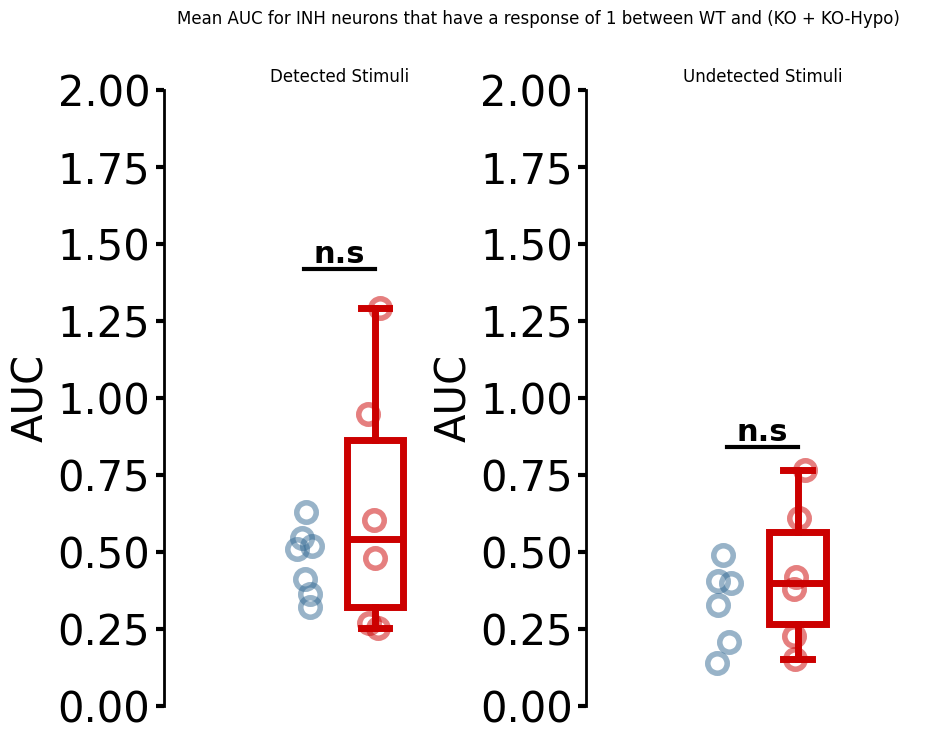

In [8]:
for neurone_type in ["EXC", "INH"]:
    for response_type in [-1, 1]:
        wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
        for rec in recs.values():
            stim_at_threshold = rec.stim_ampl == rec.threshold
            # For detected stimuli
            stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
            resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
            detected = rec.matrices[neurone_type]["AUC"][:,stim_thre_det]
            det = np.where(resp_detected == response_type, detected, np.nan)
            
            # For undetected stimuli
            stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
            resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
            undetected = rec.matrices[neurone_type]["AUC"][:,stim_thre_undet]
            undet = np.where(resp_undetected == response_type, undetected, np.nan)
            
            if rec.genotype == "WT":
                wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            else:
                ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            
        fig, axs = plt.subplots(1,2,figsize=(10,8))
        ppt.boxplot(axs[0], wt_det,ko_det,"AUC",ylim=[])
        ppt.boxplot(axs[1], wt_undet,ko_undet,"AUC",ylim=[])
        axs[0].set_title("Detected Stimuli")
        axs[1].set_title("Undetected Stimuli")
        fig.suptitle(f"Mean AUC for {neurone_type} neurons that have a response of {response_type} between WT and (KO + KO-Hypo)")

## Comparison between WT and KO-Hypo for stimulations at threshold amplitude

Boxplot plotting.
AUC
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.9403242279067238, pvalue=0.6563046792723297)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9944886920088295, pvalue=0.9993004951224285)
ShapiroResult(statistic=0.7713408698463181, pvalue=0.059971550176209865)
TtestResult(statistic=0.8384850671199687, pvalue=0.421348481485749, df=10.0)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.8398650653592561, pvalue=0.07508213596461573)
ShapiroResult(statistic=0.8151327933157918, pvalue=0.13224537789970953)
TtestResult(statistic=-0.33600268988399573, pvalue=0.7438124373875249, df=10.0)
Boxplot plotting.
AUC
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroRe

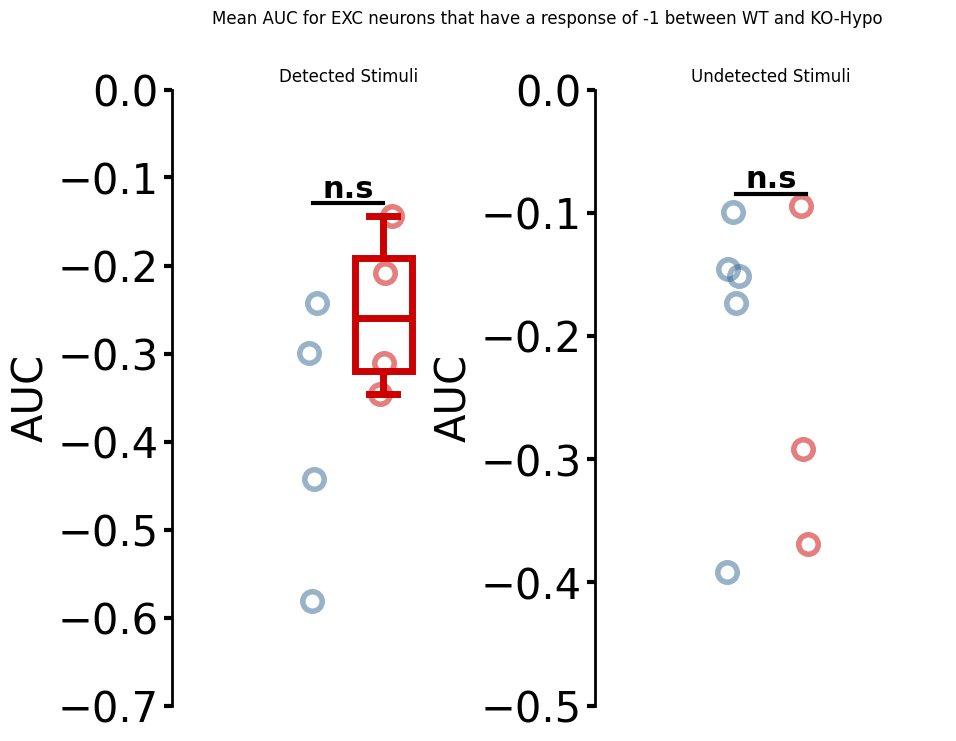

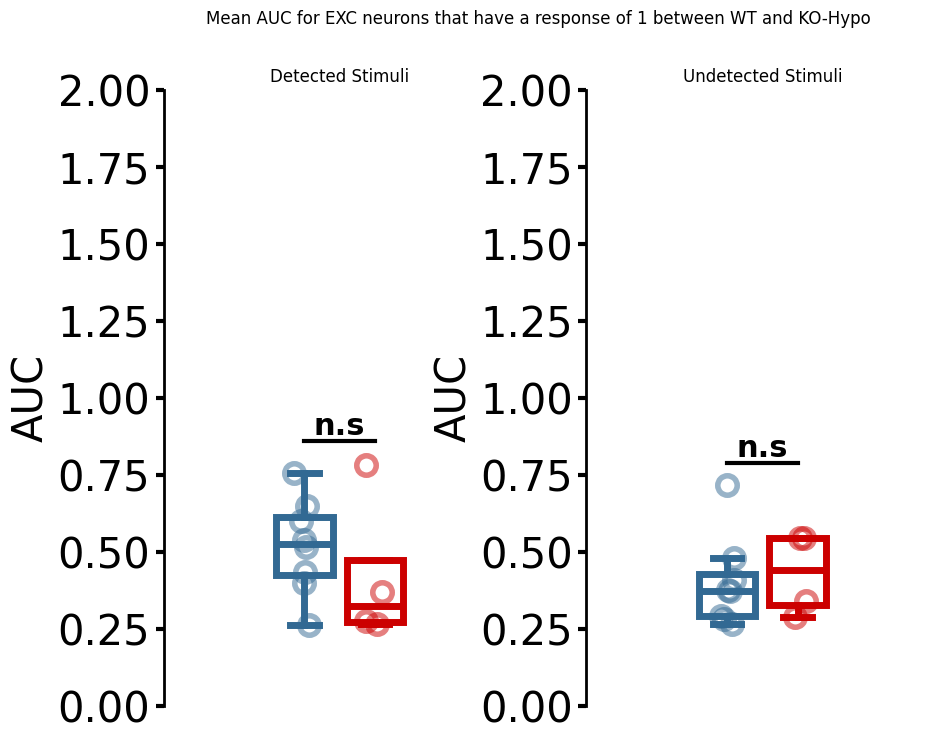

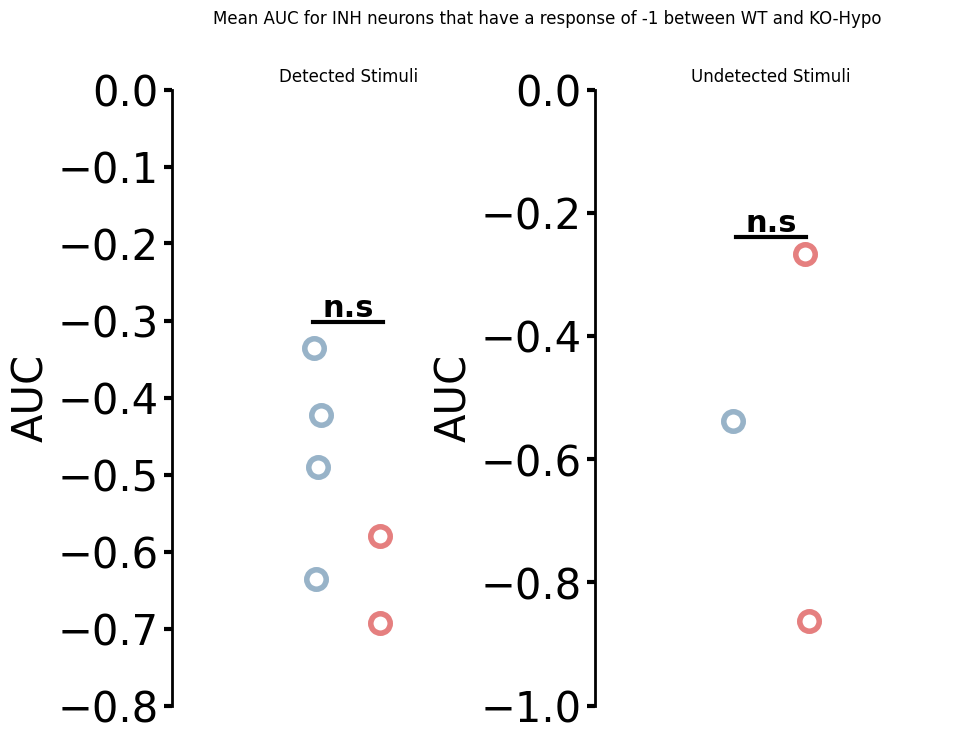

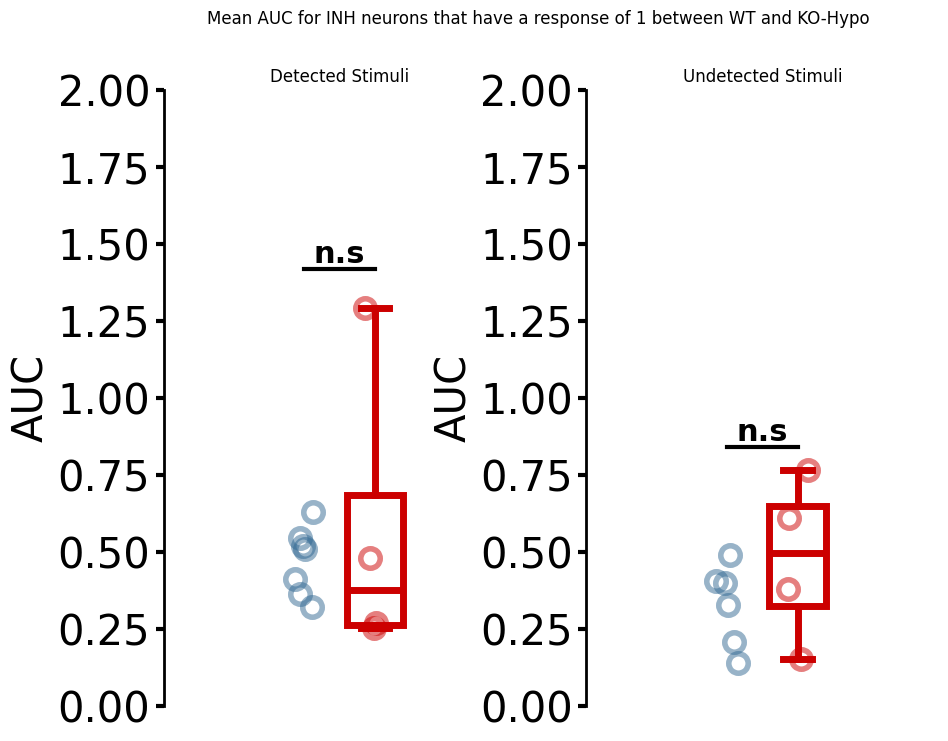

In [12]:
for neurone_type in ["EXC", "INH"]:
    for response_type in [-1, 1]:
        wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
        for rec in recs.values():
            stim_at_threshold = rec.stim_ampl == rec.threshold
            # For detected stimuli
            stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
            resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
            detected = rec.matrices[neurone_type]["AUC"][:,stim_thre_det]
            det = np.where(resp_detected == response_type, detected, np.nan)
            
            # For undetected stimuli
            stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
            resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
            undetected = rec.matrices[neurone_type]["AUC"][:,stim_thre_undet]
            undet = np.where(resp_undetected == response_type, undetected, np.nan)
            
            if rec.genotype == "WT":
                wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            elif rec.genotype == "KO-Hypo":
                ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            
        fig, axs = plt.subplots(1,2,figsize=(10,8))
        ppt.boxplot(axs[0], wt_det,ko_det,"AUC",ylim=[])
        ppt.boxplot(axs[1], wt_undet,ko_undet,"AUC",ylim=[])
        axs[0].set_title("Detected Stimuli")
        axs[1].set_title("Undetected Stimuli")
        fig.suptitle(f"Mean AUC for {neurone_type} neurons that have a response of {response_type} between WT and KO-Hypo")

# Detected vs. Undetected stimulus - All amplitudes

---

Boxplot plotting.
AUC
ShapiroResult(statistic=0.8877579093356948, pvalue=0.22301895417204942)
ShapiroResult(statistic=0.922283532394076, pvalue=0.44866547251087835)
TtestResult(statistic=-1.4419108437674415, pvalue=0.19253043793470997, df=7)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.7780488886638884, pvalue=0.036962388584196)
ShapiroResult(statistic=0.9127197530257838, pvalue=0.45452950385110913)
WilcoxonResult(statistic=8.0, pvalue=0.6875)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.8853564817275801, pvalue=0.36201837110868146)
ShapiroResult(statistic=0.9785067957984213, pvalue=0.8932070372343254)
TtestResult(statistic=-2.1601046997100566, pvalue=0.11956388408844752, df=3)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9339596992364809, pvalue=0.5527922006029502)
ShapiroResult(statistic=0.9921106868569991, pvalue=0.9976897055762041)
TtestResult(statistic=2.2505218774804407, pvalue=0.05915256379522866, df=7)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.8612265078022259, p

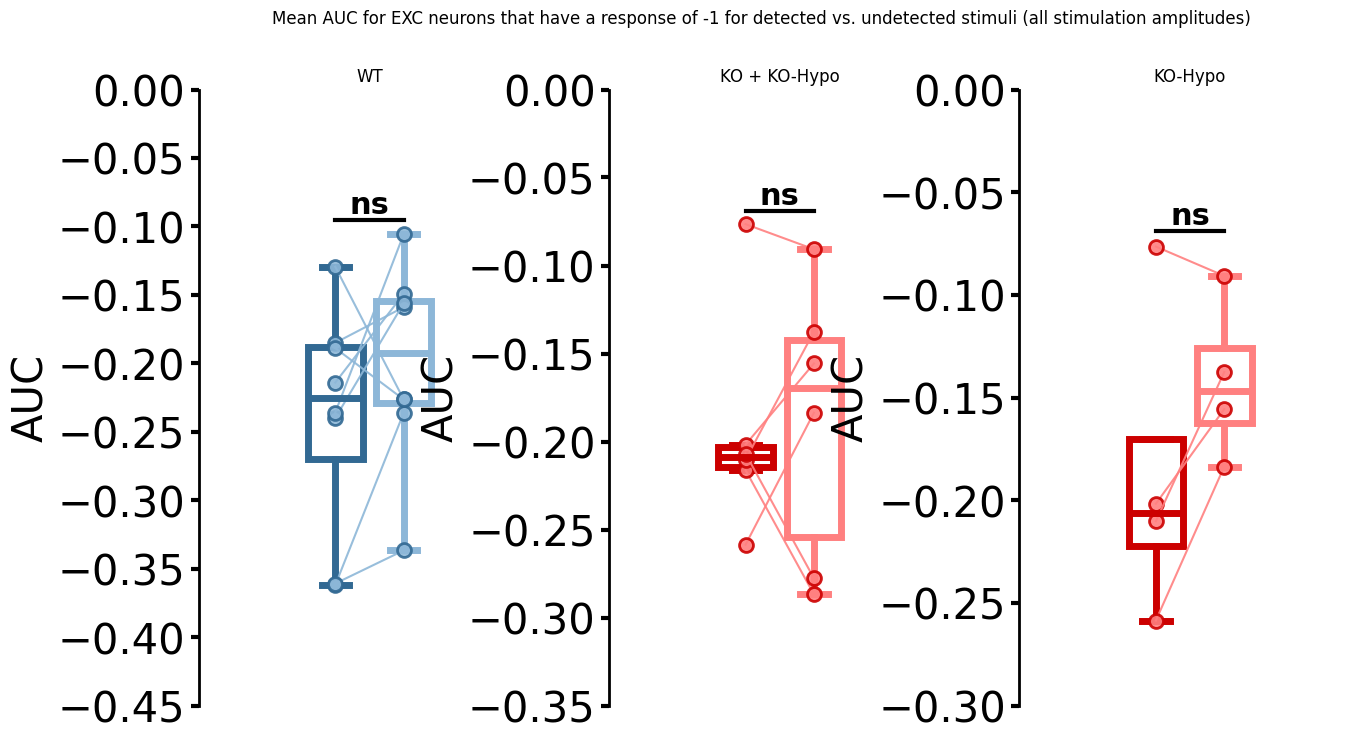

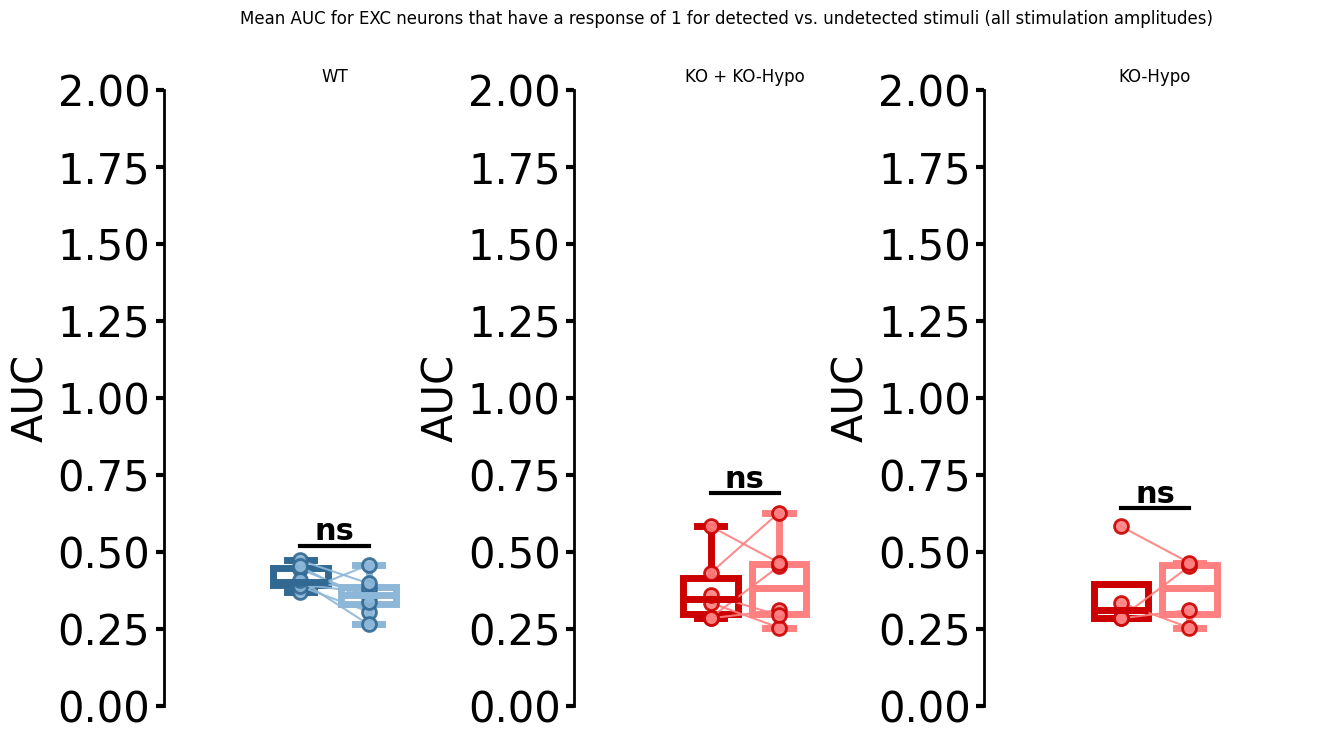

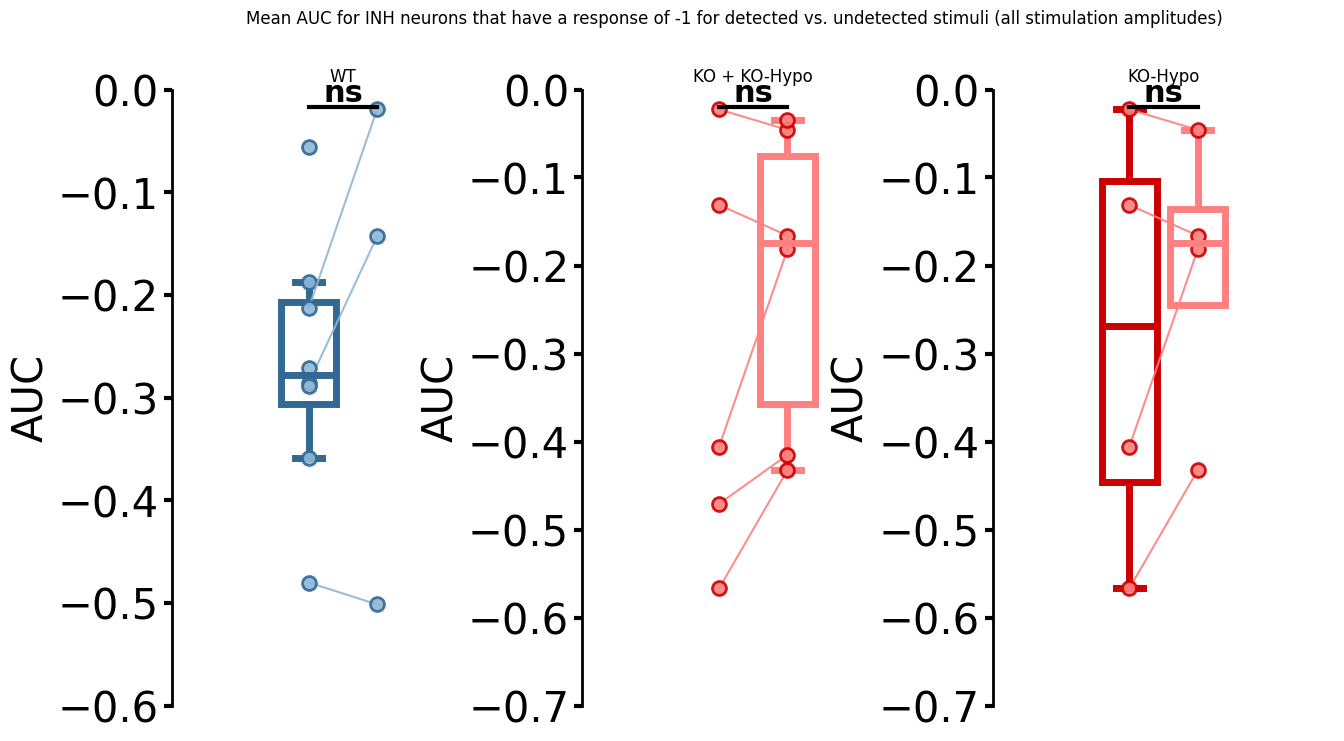

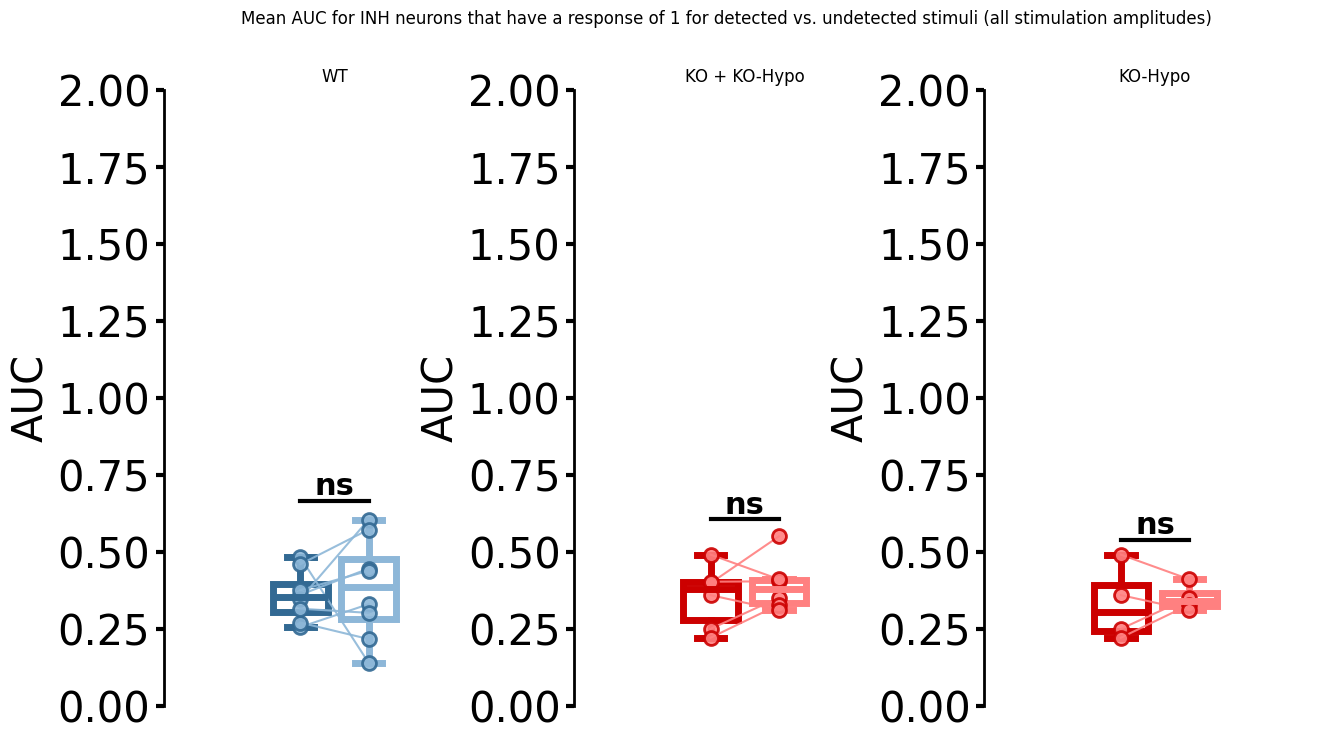

In [13]:
for neurone_type in ["EXC", "INH"]:
    for response_type in [-1, 1]:
        wt_det, wt_undet, ko_det, ko_undet, hypo_det, hypo_undet = [],[],[],[],[],[]
        for rec in recs.values():
            # For detected stimuli
            resp_detected = rec.matrices[neurone_type]["Responsivity"][:,rec.detected_stim]
            detected = rec.matrices[neurone_type]["AUC"][:,rec.detected_stim]
            det = np.where(resp_detected == response_type, detected, np.nan)
            
            # For undetected stimuli
            resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,np.invert(rec.detected_stim)]
            undetected = rec.matrices[neurone_type]["AUC"][:,np.invert(rec.detected_stim)]
            undet = np.where(resp_undetected == response_type, undetected, np.nan)
            
            if rec.genotype == "WT":
                wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            else:
                ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            if rec.genotype == "KO-Hypo":
                hypo_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                hypo_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            
        fig, axs = plt.subplots(1,3,figsize=(15,8))
        ppt.paired_boxplot(axs[0], wt_det,wt_undet,"AUC", "WT", ylim=[],colors=[ppt.wt_color, ppt.light_wt_color])
        ppt.paired_boxplot(axs[1], ko_det,ko_undet,"AUC", "KO + KO-Hypo",ylim=[])
        ppt.paired_boxplot(axs[2], hypo_det,hypo_undet,"AUC", "KO-Hypo",ylim=[])
        fig.suptitle(f"Mean AUC for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (all stimulation amplitudes)")

# Detected vs. Undetected stimulus - Threshold amplitude

---

Boxplot plotting.
AUC
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9366818471137228, pvalue=0.6325938831534172)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9403242279067238, pvalue=0.6563046792723297)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9944886920088295, pvalue=0.9993004951224285)
ShapiroResult(statistic=0.8398650653592561, pvalue=0.07508213596461573)
TtestResult(statistic=1.4304366857141217, pvalue=0.19567519026865665, df=7)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.8959008482916235, pvalue=0.3502673632368643)
ShapiroResult(statistic=0.8683094869058298, pvalue=0.219549285037833)
TtestResult(statistic=0.12936738271341203, pvalue=0.9021099887882968, df=5)
Boxplot plotting.
AUC


posx and posy should be finite values


AUC
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.9065474932528907, pvalue=0.4140751899581258)
ShapiroResult(statistic=0.959246440506967, pvalue=0.8139143745684856)
TtestResult(statistic=1.312239095067113, pvalue=0.24644899949920013, df=5)
Boxplot plotting.
AUC
ShapiroResult(statistic=0.7800451371291169, pvalue=0.07098491851062215)
ShapiroResult(statistic=0.9786730063142738, pvalue=0.8941928435285551)
TtestResult(statistic=0.4736422501720209, pvalue=0.6680900452560937, df=3)


posx and posy should be finite values


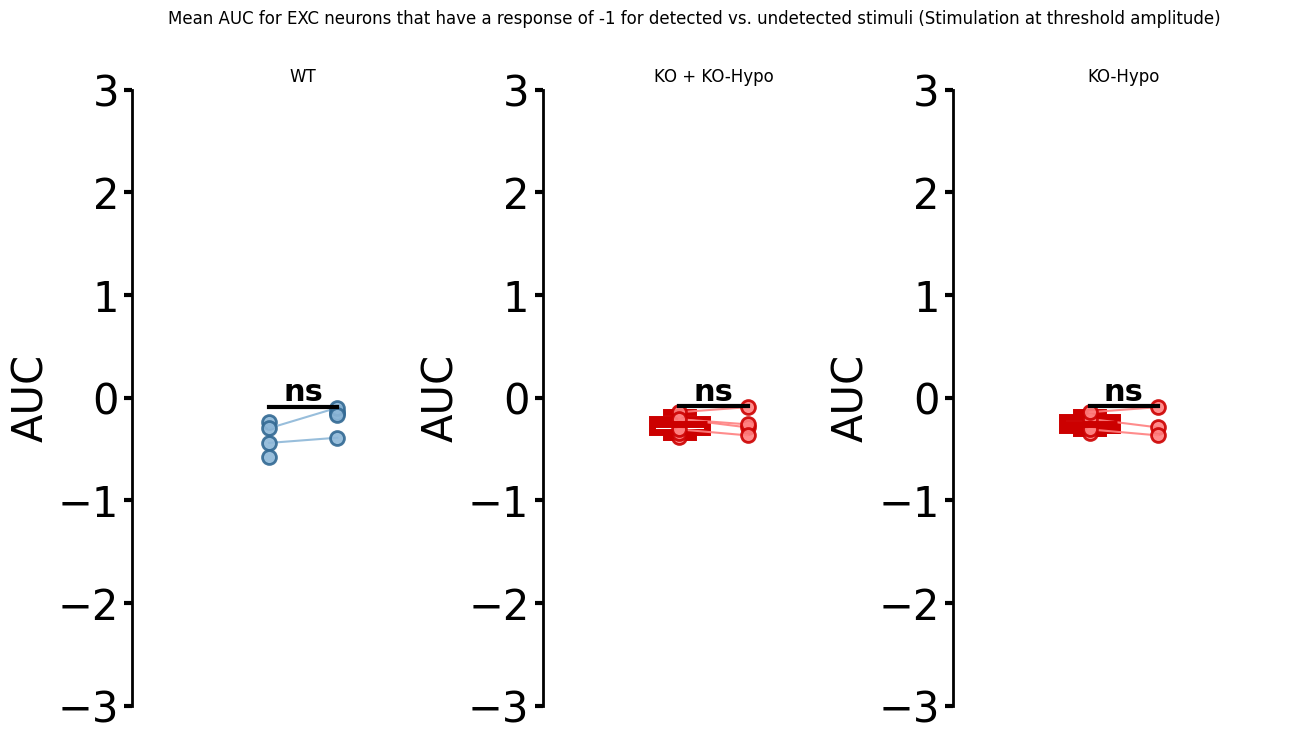

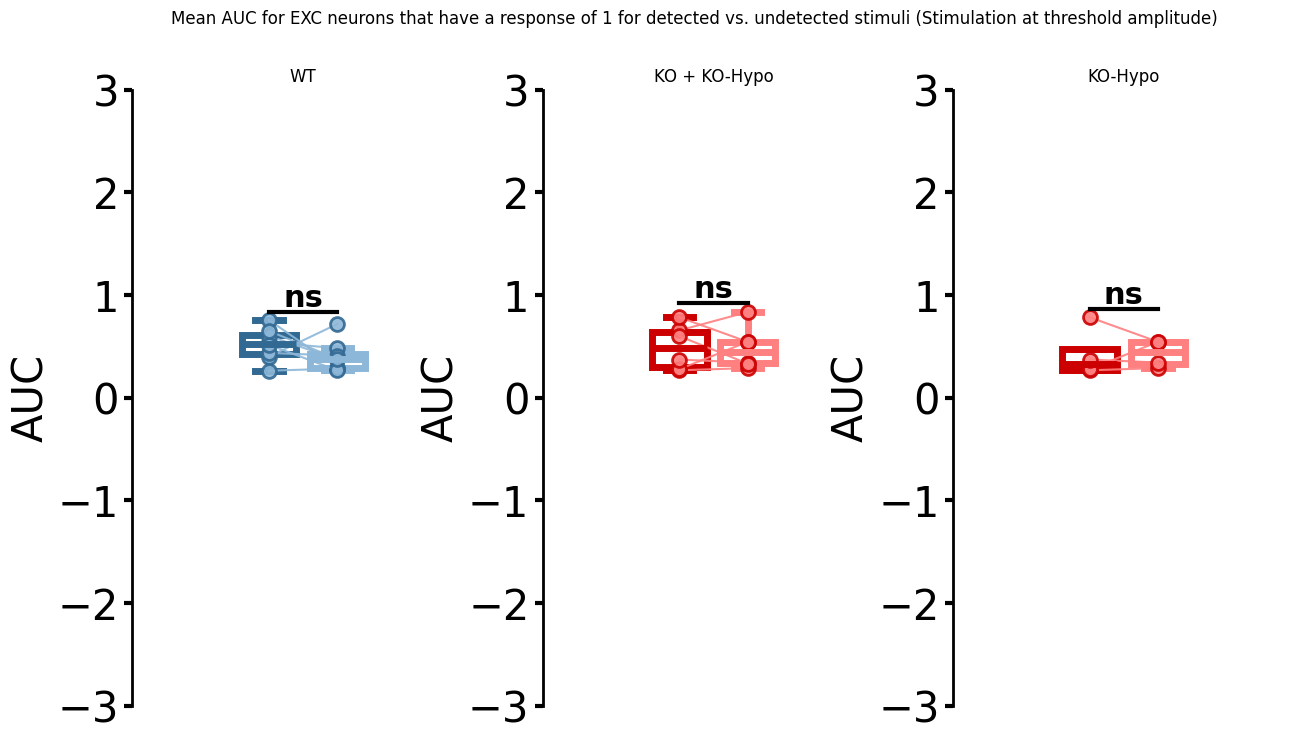

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


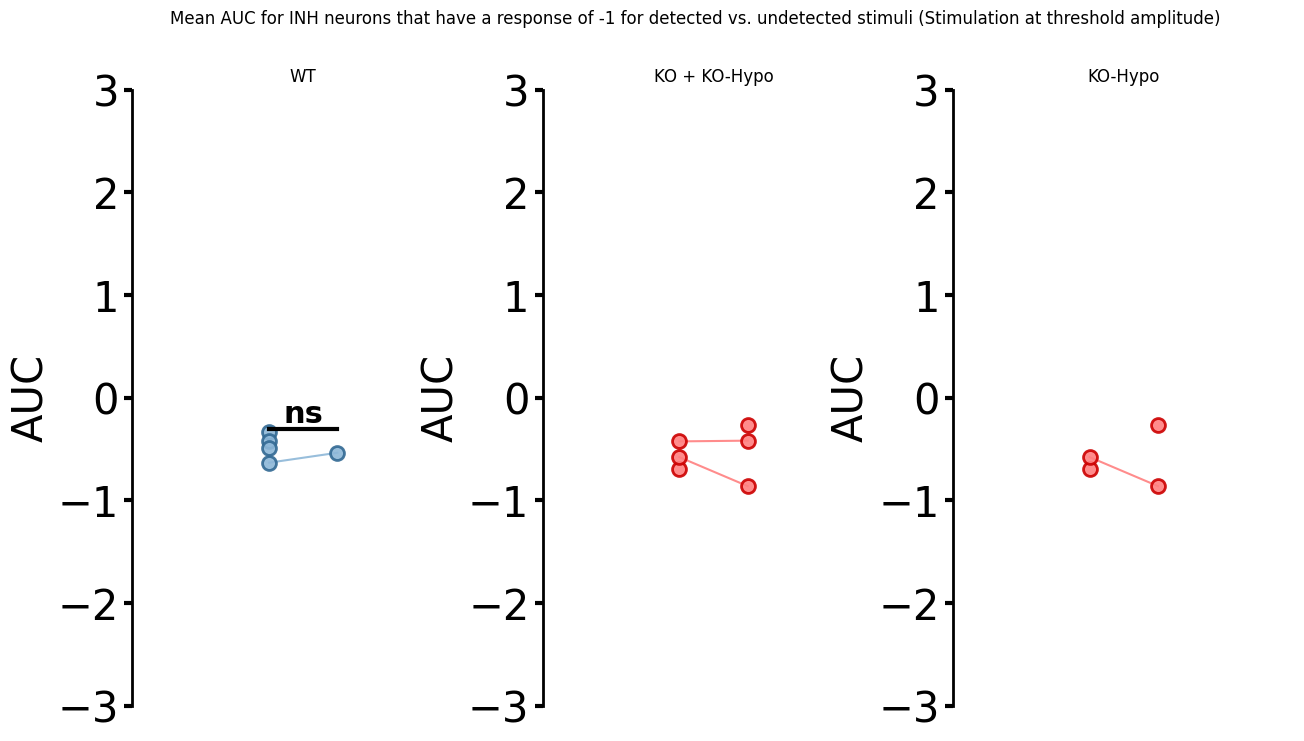

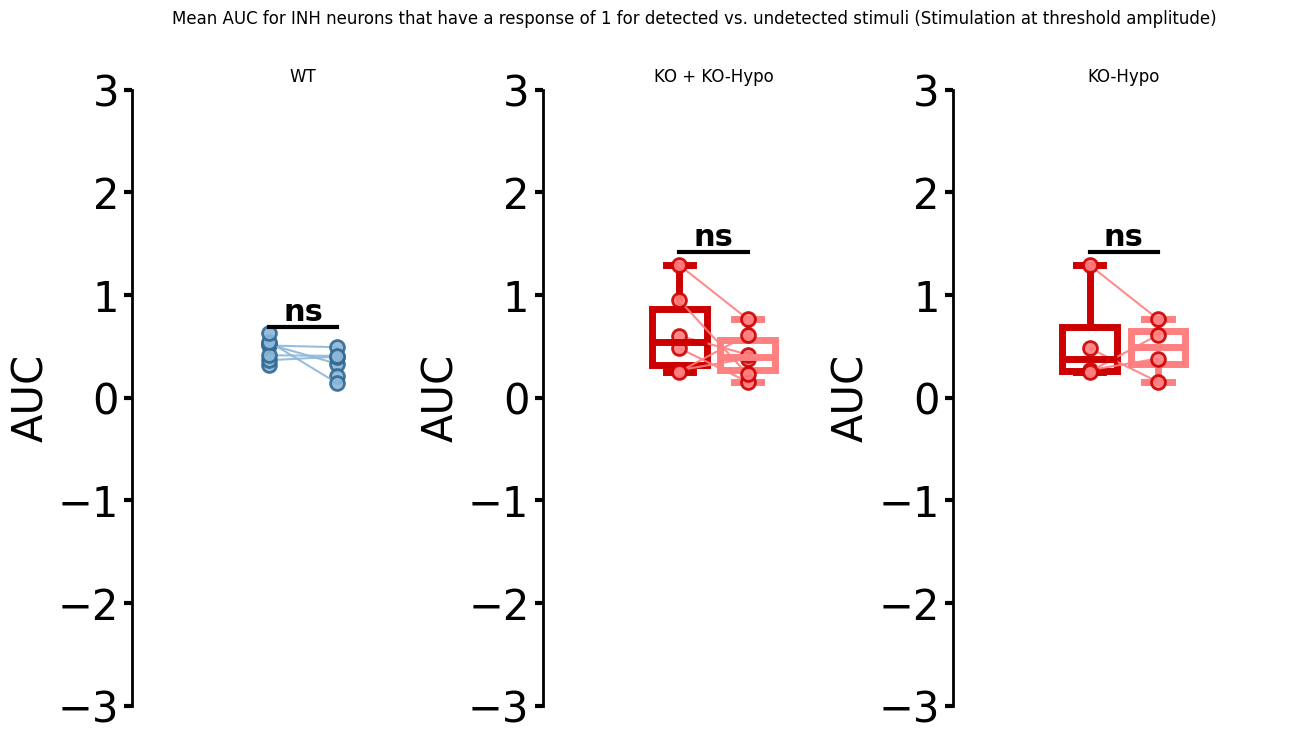

In [16]:
for neurone_type in ["EXC", "INH"]:
    for response_type in [-1, 1]:
        wt_det, wt_undet, ko_det, ko_undet, hypo_det, hypo_undet = [],[],[],[],[],[]
        for rec in recs.values():
            stim_at_threshold = rec.stim_ampl == rec.threshold
            # For detected stimuli
            stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
            resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
            detected = rec.matrices[neurone_type]["AUC"][:,stim_thre_det]
            det = np.where(resp_detected == response_type, detected, np.nan)
            
            # For undetected stimuli
            stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
            resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
            undetected = rec.matrices[neurone_type]["AUC"][:,stim_thre_undet]
            undet = np.where(resp_undetected == response_type, undetected, np.nan)
            
            if rec.genotype == "WT":
                wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            else:
                ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            if rec.genotype == "KO-Hypo":
                hypo_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                hypo_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            
        fig, axs = plt.subplots(1,3,figsize=(15,8))
        ppt.paired_boxplot(axs[0], wt_det,wt_undet,"AUC", "WT", ylim=[-3,3],colors=[ppt.wt_color, ppt.light_wt_color])
        ppt.paired_boxplot(axs[1], ko_det,ko_undet,"AUC", "KO + KO-Hypo",ylim=[-3,3])
        ppt.paired_boxplot(axs[2], hypo_det,hypo_undet,"AUC", "KO-Hypo",ylim=[-3,3])
        fig.suptitle(f"Mean AUC for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (Stimulation at threshold amplitude)")